# Wind vector plot

#### Written by - Chandrima Chakrabarty (chakrabartychandrima91@gmail.com)

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

from matplotlib.cm import get_cmap
from scipy.optimize import curve_fit

from cartopy import config
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE

import matplotlib.patches as patches
import matplotlib.dates as mdates

### Wind data from NCEP

In [2]:
ncep_u = xr.open_dataset('/home/cccr/supriyo/abir/ncep_wind/2013_2020_uwnd_ncep_pres.nc')
ncep_v = xr.open_dataset('/home/cccr/supriyo/abir/ncep_wind/2013_2020_vwnd_ncep_pres.nc')

In [ ]:
mon_u = ncep_u.resample(time='1M').mean(dim='time')
mon_v = ncep_v.resample(time='1M').mean(dim='time')

#### Climatology of wind

In [20]:
clim_u = mon_u.groupby('time.month').mean(dim='time')
clim_v = mon_v.groupby('time.month').mean(dim='time')

In [21]:
lon_w = clim_u.lon
lat_w = clim_u.lat

##### Climatology of Jan-Feb-Mar and mean seasonality over three different regions

/home/cccr/supriyo/.conda/envs/environment1/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.15, 0.15, 'b')

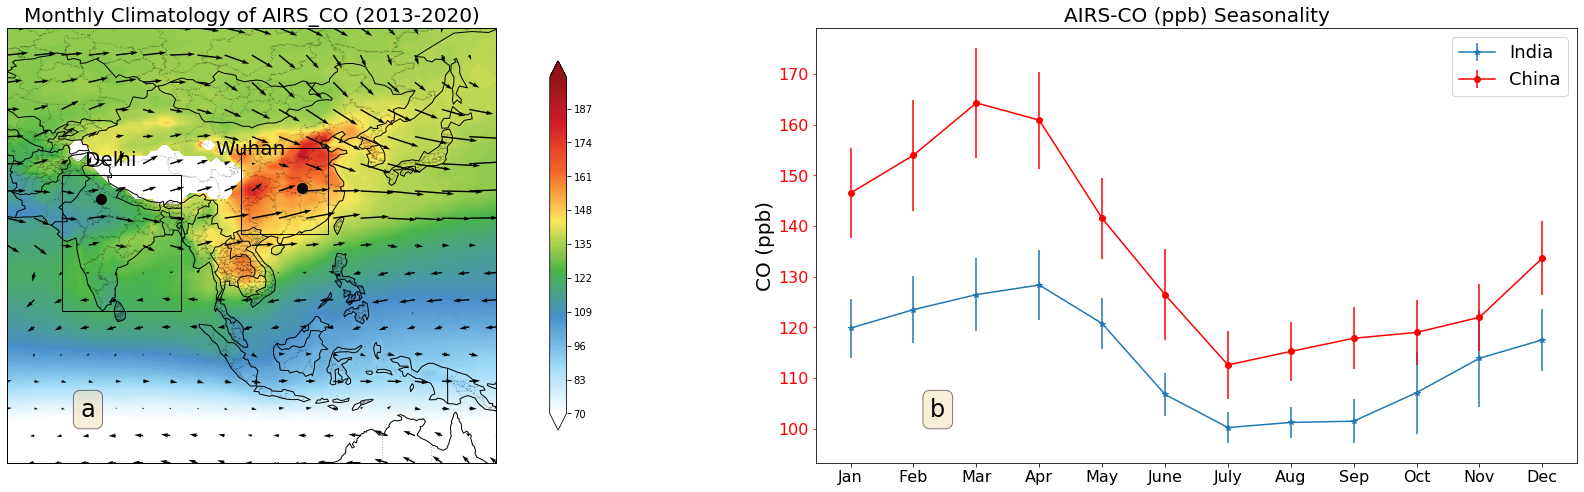

In [22]:
fig=plt.figure(figsize=[30,8])
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())

q = ax.quiver(lon_w[::2],lat_w[::2],clim_u.uwnd[0:3,3,::2,::2].mean(dim='month'),
              clim_v.vwnd[0:3,3,::2,::2].mean(dim='month'),scale=200.)

wu_lon, wu_lat       = 114.30, 30.59
delhi_lon, delhi_lat = 77.23, 28.61
#nay_lon, nay_lat     = 96.07, 19.76

plt.plot(wu_lon, wu_lat, color='k', marker='o', markersize=10,
         transform=ccrs.Geodetic(),
         )

plt.plot(delhi_lon, delhi_lat,
         color='k', marker = 'o',markersize=10,
         transform=ccrs.PlateCarree(),
         )

plt.text(wu_lon - 3, wu_lat +6, 'Wuhan',fontsize=20,
         horizontalalignment='right',color='k',
         transform=ccrs.Geodetic())

plt.text(delhi_lon - 3, delhi_lat + 6, 'Delhi',color='k',fontsize=20,
         horizontalalignment='left',
         transform=ccrs.Geodetic())

rect1 = patches.Rectangle((70,8),22,25,linewidth=1,edgecolor='k',facecolor='None')
#rect2 = patches.Rectangle((92,14),14,10,linewidth=1,edgecolor='k',facecolor='None')
rect3 = patches.Rectangle((103,22),16,16,linewidth=1,edgecolor='k',facecolor='None')

ax.add_patch(rect1)
#ax.add_patch(rect2)
ax.add_patch(rect3)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.15, 0.15, 'a', transform=ax.transAxes, fontsize=24,
        verticalalignment='top', bbox=props)
